In [1]:
import torch
import numpy
import re
import pandas as pd

from matplotlib import colors as mcolors
from pylab import *
# plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
# helper function because HC sparsities are messy
def get_avg_sparsity(row):
    sparsity_list = list(map(float, row.model_sparsity.replace('[', '').replace(']', '').split(',')))
    return 1.0*sum(sparsity_list)/len(sparsity_list)

In [3]:
# load all the datafiles you want to plot here

df_weight_train = pd.read_csv("results/results_acc_mnist_training.csv")
df_ep = pd.read_csv("results/results_acc_mnist_ep.csv")
df_hc = pd.read_csv("results/HC_results_mnist.csv")
df_hc['model_sparsity'] = df_hc.apply(lambda row: get_avg_sparsity(row), axis=1)
df_greedy = pd.read_csv("results/plot_data_mnist_greedy.csv")
# rename columns
df_greedy.columns = ['train_acc', 'test_acc', 'epoch', 'model_sparsity']
# df_greedy['sparsity'] = -1
df_pt_hacky = pd.read_csv("results/results_acc_mnist_pt_hacky_adam.csv")
df_pt_noreg = pd.read_csv("results/results_acc_mnist_pt_noreg_adam.csv")
df_pt_reg = pd.read_csv("results/results_acc_mnist_pt_reg_adam.csv")


df_list = [df_weight_train, df_ep, df_hc, df_greedy, df_pt_hacky, df_pt_noreg, df_pt_reg]

df_ep.head() # just to make sure it looks fine

,epoch,test_acc,model_sparsity
0,1,97.08,50.0
1,2,97.79,50.0
2,3,97.40,50.0
3,4,97.07,50.0
4,5,96.65,50.0


In [4]:
# increasing this makes the curve smoother but less informative
SMOOTHING_WINDOW=10

for df in df_list:
    df['test_acc_smooth'] = df.test_acc.rolling(window=10, min_periods=1).mean()

<Figure size 1440x1872 with 0 Axes>

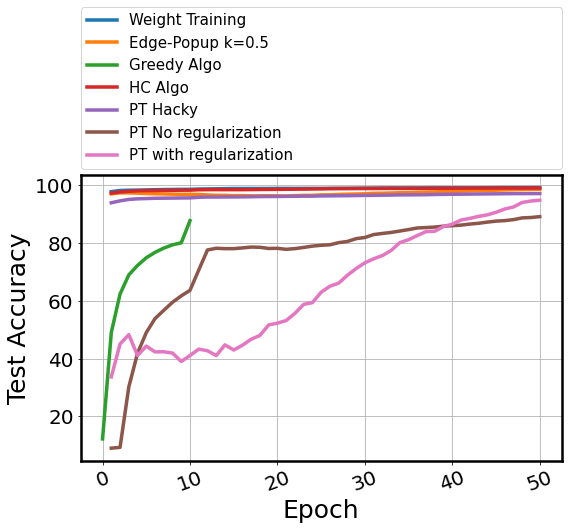

In [5]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# test acc
df_weight_train[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

df_ep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")

df_greedy[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"Greedy Algo")

df_hc[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC Algo")

df_pt_hacky[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"PT Hacky")

df_pt_noreg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C5", markersize=20, markevery=1,
                              label=r"PT No regularization")

df_pt_reg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C6", markersize=20, markevery=1,
                              label=r"PT with regularization")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_acc_comparison_mnist.pdf", format='png', dpi=600, bbox_inches='tight', pad_inches=0.05)

<Figure size 1440x1872 with 0 Axes>

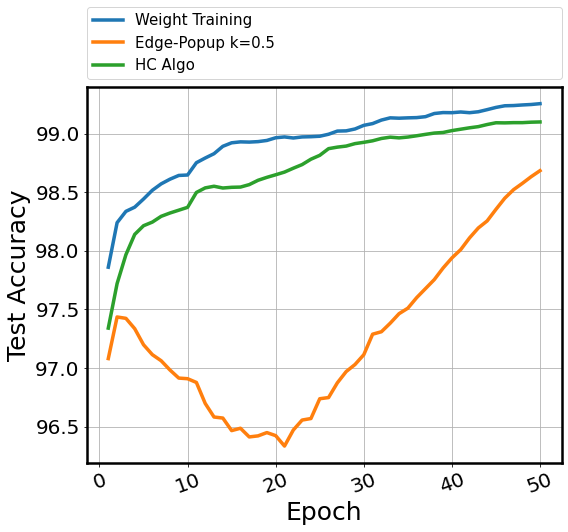

In [6]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# test acc
df_weight_train[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

df_ep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")


df_hc[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"HC Algo")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_top_acc_comparison_mnist.pdf", format='png', dpi=600, bbox_inches='tight', pad_inches=0.05)

<Figure size 1440x1872 with 0 Axes>

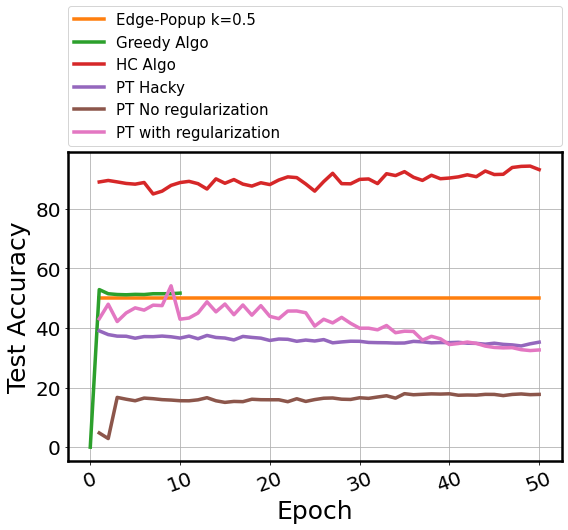

In [8]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# sparsity

df_ep[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")

df_greedy[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"Greedy Algo")

df_hc[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC Algo")

df_pt_hacky[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"PT Hacky")

df_pt_noreg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C5", markersize=20, markevery=1,
                              label=r"PT No regularization")

df_pt_reg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C6", markersize=20, markevery=1,
                              label=r"PT with regularization")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_sparsity_comparison_mnist.pdf", format='png', dpi=600, bbox_inches='tight', pad_inches=0.05)